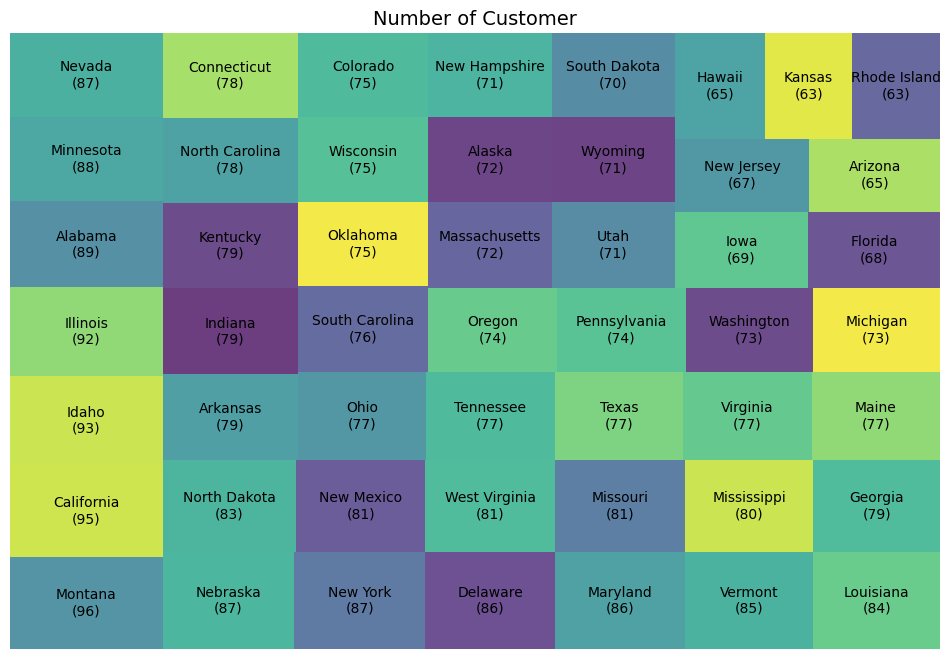

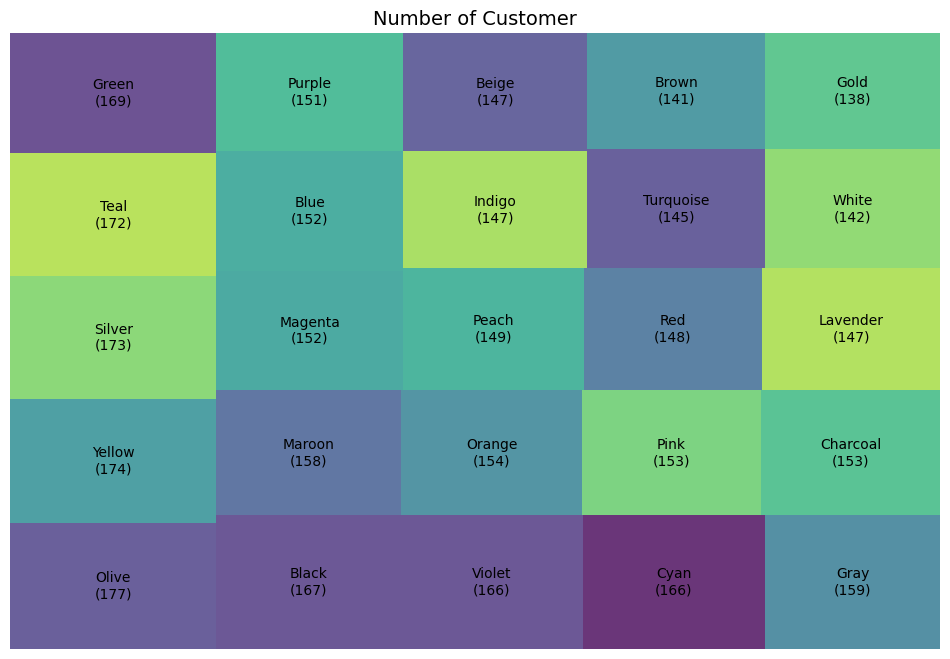

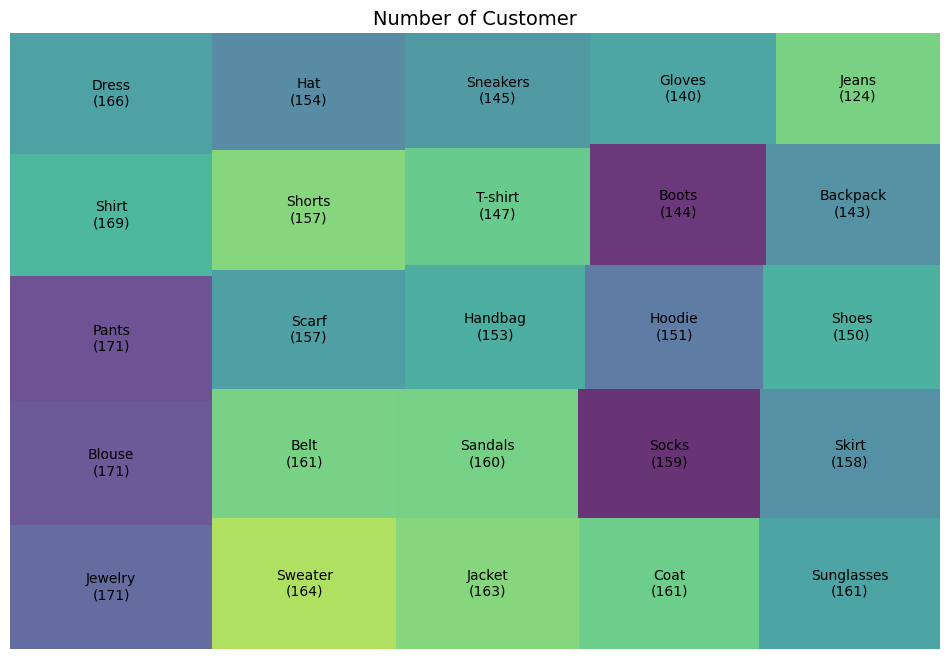

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import squarify

# Exploratory Data Analysis (EDA) - Tree Map Total Customer Per Context
# Dataset
data = pd.read_csv("shopping_trends.csv")

context_col = ['Location','Color','Item Purchased']

for dt in context_col:
    total_context = data.groupby(dt)['Customer ID'].count().reset_index()
    
    # Sort 
    total_context = total_context.sort_values(by='Customer ID', ascending=False)
    
    # Extract
    sizes = total_context['Customer ID']
    labels = total_context.apply(lambda x: f"{x[dt]}\n({x['Customer ID']})", axis=1)
    
    # Plot Tree Map
    plt.figure(figsize=(12, 8))
    squarify.plot(sizes=sizes, label=labels, alpha=0.8)
    plt.title("Number of Customer", fontsize=14)
    plt.axis('off')
    plt.show()